<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Obiettivo:-confrontare-l'effetto-di-diversi-scaler-sui-dati-con-valori-anomali-¶" data-toc-modified-id="Obiettivo:-confrontare-l'effetto-di-diversi-scaler-sui-dati-con-valori-anomali-¶-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Obiettivo: confrontare l'effetto di diversi scaler sui dati con valori anomali ¶</a></span><ul class="toc-item"><li><span><a href="#In-particolare-confronta-gli-effetti-dei-tre-scaler:-MinMaxScaler,-StandarScaler-e-RobustScaler-sul-dataset-'california_housing_dataset'-presente-nella-libreria-sklearn-(https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)" data-toc-modified-id="In-particolare-confronta-gli-effetti-dei-tre-scaler:-MinMaxScaler,-StandarScaler-e-RobustScaler-sul-dataset-'california_housing_dataset'-presente-nella-libreria-sklearn-(https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>In particolare confronta gli effetti dei tre scaler: MinMaxScaler, StandarScaler e RobustScaler sul dataset 'california_housing_dataset' presente nella libreria sklearn (<a href="https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset" target="_blank">https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset</a>)</a></span><ul class="toc-item"><li><span><a href="#Graficare-il-pre-e-post-scalatura-sui-dati-può-aiutarti-ad-osservare-meglio-come-cambiano-le-distribuzioni-;)" data-toc-modified-id="Graficare-il-pre-e-post-scalatura-sui-dati-può-aiutarti-ad-osservare-meglio-come-cambiano-le-distribuzioni-;)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Graficare il pre e post scalatura sui dati può aiutarti ad osservare meglio come cambiano le distribuzioni ;)</a></span></li></ul></li></ul></li><li><span><a href="#Soluzioni" data-toc-modified-id="Soluzioni-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Soluzioni</a></span></li><li><span><a href="#Original-data" data-toc-modified-id="Original-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Original data</a></span></li><li><span><a href="#StandardScaler" data-toc-modified-id="StandardScaler-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>StandardScaler</a></span></li><li><span><a href="#RobustScaler" data-toc-modified-id="RobustScaler-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>RobustScaler</a></span><ul class="toc-item"><li><span><a href="#References" data-toc-modified-id="References-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

## Obiettivo: confrontare l'effetto di diversi scaler sui dati con valori anomali ¶

### In particolare confronta gli effetti dei tre scaler: MinMaxScaler, StandarScaler e RobustScaler sul dataset 'california_housing_dataset' presente nella libreria sklearn (https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

#### Graficare il pre e post scalatura sui dati può aiutarti ad osservare meglio come cambiano le distribuzioni ;)



## Soluzioni

**Questo che vedrete è solo uno dei tanti modi con cui si poteva visualizzare il pre e post scalatura per mostrare
in che modo la distribuzione dei dati viene influenzata :)  Non c'è un'unica soluzione, l'importante è capire
come cambiano le distribuzioni a partire dalle visualizzazioni che preferite**


La feature 0 (reddito medio in un blocco) e la feature 5 (occupazione media della casa) california_housing_dataset hanno scale molto diverse e contengono valori anomali molto grandi. Queste due caratteristiche portano a difficoltà nella visualizzazione dei dati e, soprattutto, possono degradare le prestazioni predittive di molti algoritmi di apprendimento automatico. I dati non scalati possono anche rallentare o addirittura impedire la convergenza di molti stimatori basati su gradiente.

In effetti, molti stimatori sono progettati partendo dal presupposto che ogni caratteristica assume valori prossimi allo zero o, cosa più importante, che tutte le caratteristiche variano su scale comparabili. In particolare, gli stimatori basati su metriche e gradienti spesso presuppongono dati approssimativamente standardizzati (caratteristiche centrate con varianze unitarie). Un'eccezione degna di nota sono gli stimatori basati sull'albero decisionale che sono robusti al ridimensionamento arbitrario dei dati.

Gli scaler sono trasformatori lineari (o più precisamente affini) e differiscono l'uno dall'altro nel modo in cui stimano i parametri utilizzati per spostare e ridimensionare ciascuna caratteristica.

In [1]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HousAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
}

# Take only 2 features to make visualization easier
# Feature MedInc has a long tail distribution.
# Feature AveOccup has a few but very large outliers.
features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]
distributions = [
    ("Unscaled data", X),
    ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X),
    )
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

Two plots will be shown for each scaler/normalizer/transformer. The left
figure will show a scatter plot of the full data set while the right figure
will exclude the extreme values considering only 99 % of the data set,
excluding marginal outliers. In addition, the marginal distributions for each
feature will be shown on the sides of the scatter plot.



In [2]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )


## Original data

Each transformation is plotted showing two transformed features, with the
left plot showing the entire dataset, and the right zoomed-in to show the
dataset without the marginal outliers. A large majority of the samples are
compacted to a specific range, [0, 10] for the median income and [0, 6] for
the average house occupancy. Note that there are some marginal outliers (some
blocks have average occupancy of more than 1200). Therefore, a specific
pre-processing can be very beneficial depending of the application. In the
following, we present some insights and behaviors of those pre-processing
methods in the presence of marginal outliers.



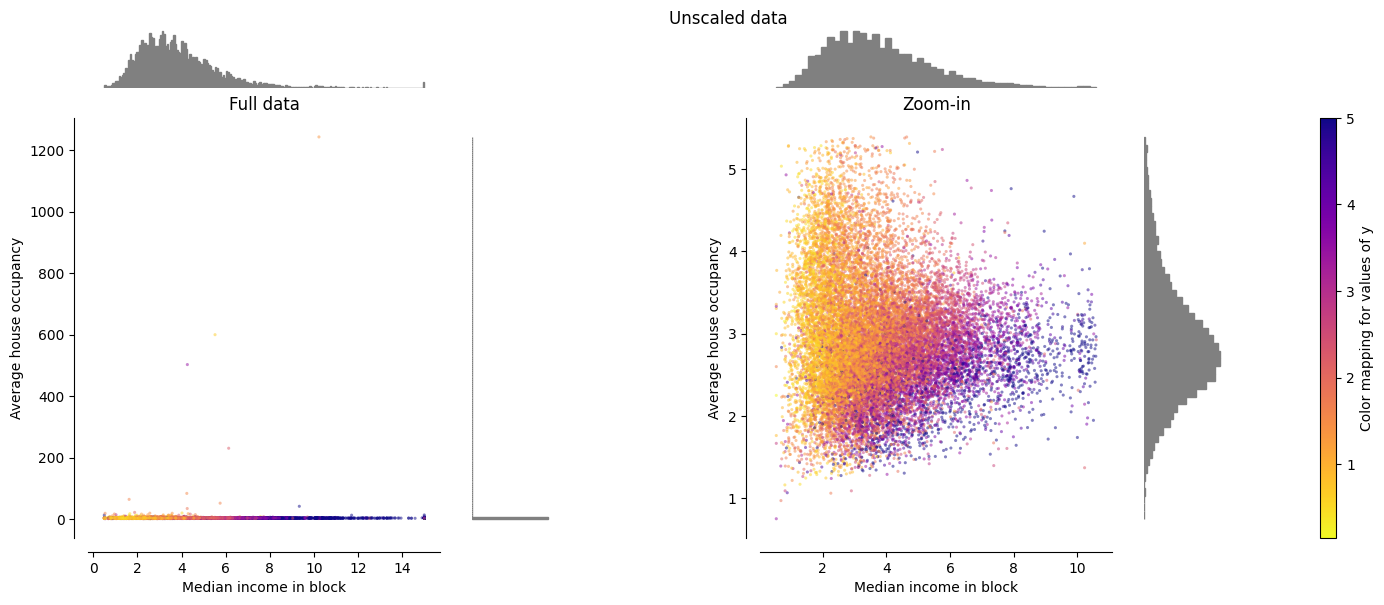

In [3]:
make_plot(0)

## StandardScaler

:class:`~sklearn.preprocessing.StandardScaler` removes the mean and scales
the data to unit variance. The scaling shrinks the range of the feature
values as shown in the left figure below.
However, the outliers have an influence when computing the empirical mean and
standard deviation. Note in particular that because the outliers on each
feature have different magnitudes, the spread of the transformed data on
each feature is very different: most of the data lie in the [-2, 4] range for
the transformed median income feature while the same data is squeezed in the
smaller [-0.2, 0.2] range for the transformed average house occupancy.

:class:`~sklearn.preprocessing.StandardScaler` therefore cannot guarantee
balanced feature scales in the
presence of outliers.



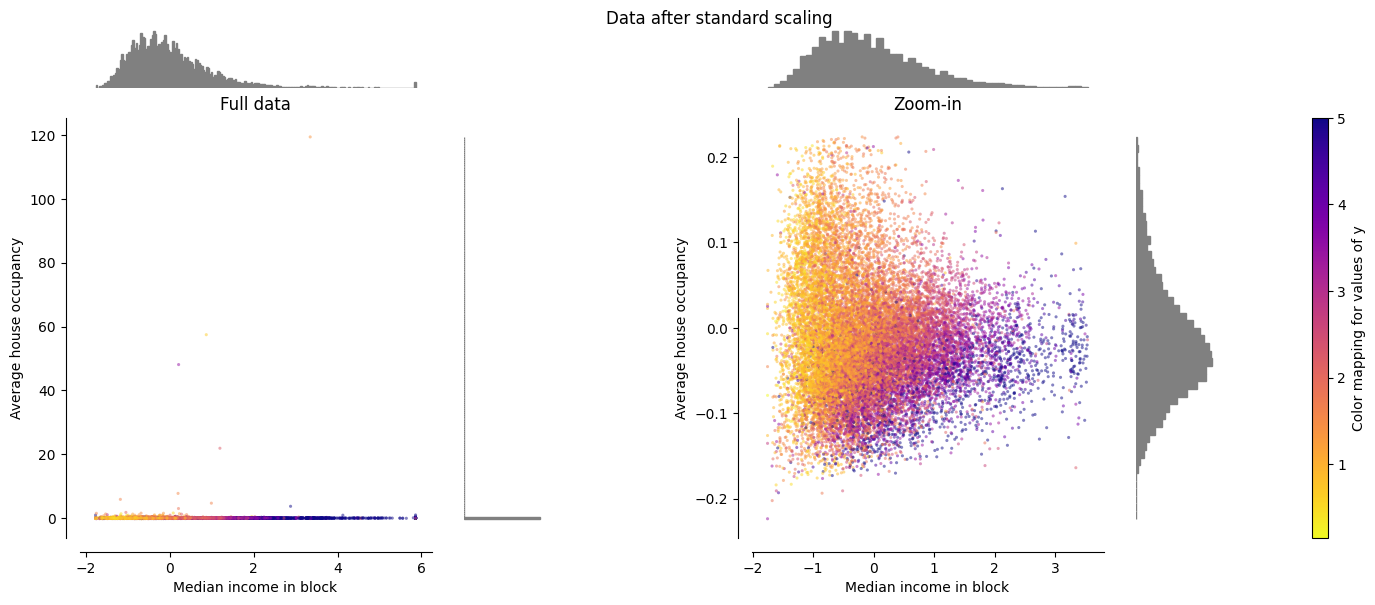

In [4]:
make_plot(1)

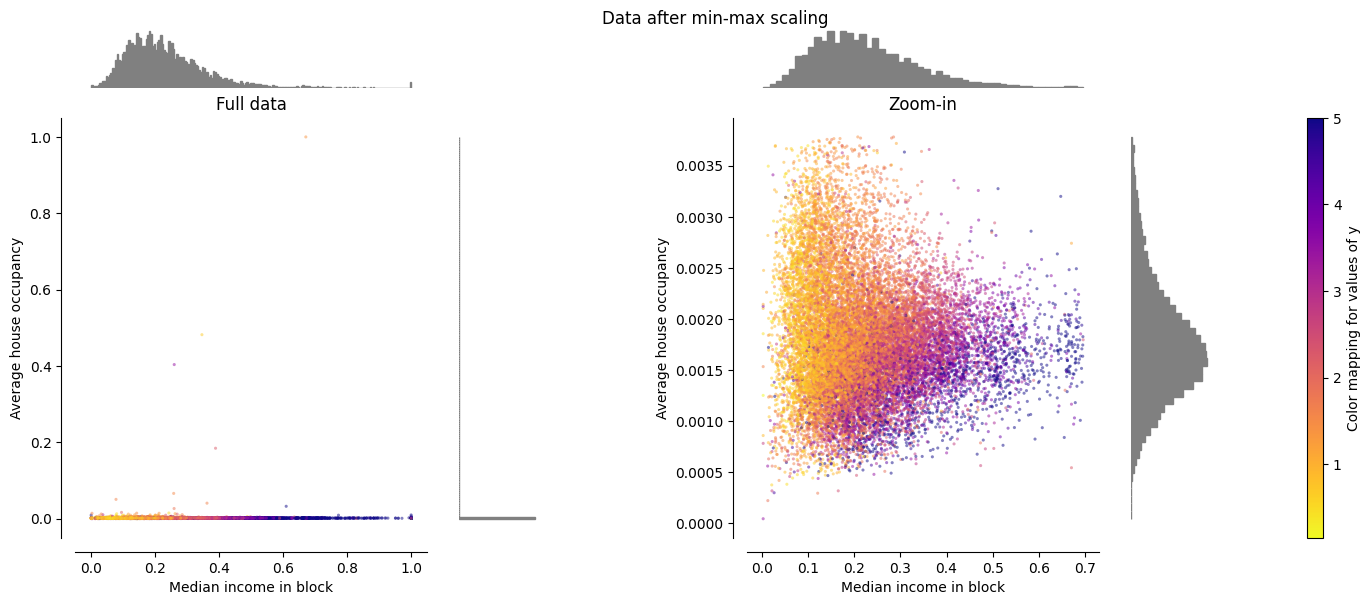

In [5]:
make_plot(2)

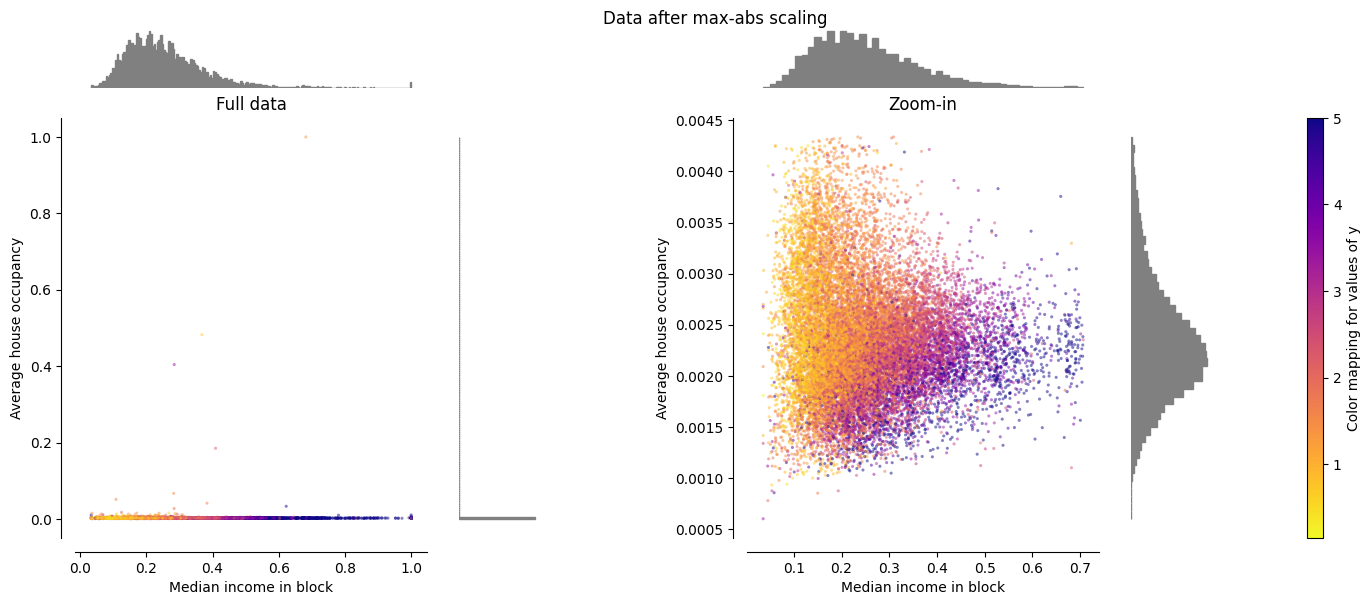

In [6]:
make_plot(3)

## RobustScaler

Unlike the previous scalers, the centering and scaling statistics of
:class:`~sklearn.preprocessing.RobustScaler`
are based on percentiles and are therefore not influenced by a small
number of very large marginal outliers. Consequently, the resulting range of
the transformed feature values is larger than for the previous scalers and,
more importantly, are approximately similar: for both features most of the
transformed values lie in a [-2, 3] range as seen in the zoomed-in figure.
Note that the outliers themselves are still present in the transformed data.
If a separate outlier clipping is desirable, a non-linear transformation is
required (see below).



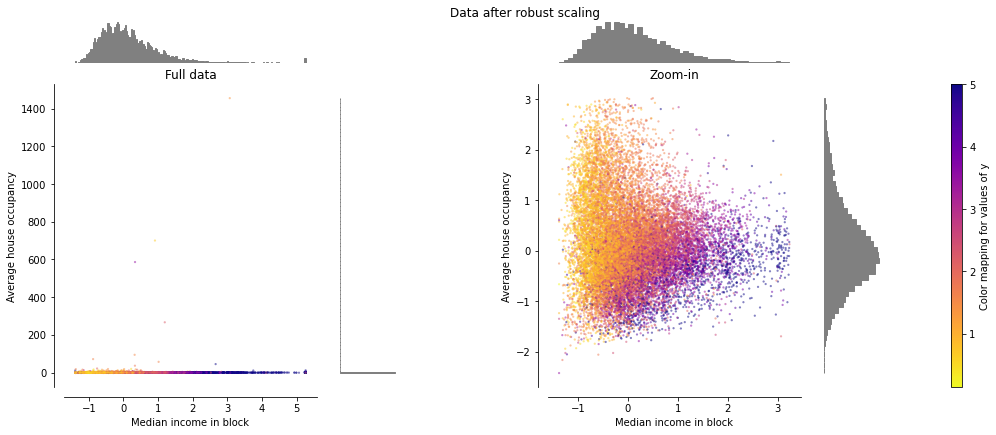

In [4]:
make_plot(4)

### References

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py